### Load Dataset

In [15]:
import pandas as pd
import numpy as np
import time
import random
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer,classification_report

In [27]:
csv_file_path = "adult.csv"

In [71]:
df = pd.read_csv(csv_file_path, na_values=['?'])
df.shape

(48842, 15)

In [72]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [74]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [75]:
df_processed = df.copy()

SUBSET_SIZE = 5000

df_processed = df_processed.sample(n=SUBSET_SIZE, random_state=42).reset_index(drop=True)

TARGET_COLUMN = 'income'
NEW_TARGET_NAME = 'Outcome'

# y = df_processed[TARGET_COLUMN]
# X = df_processed.drop(TARGET_COLUMN, axis=1)
# COLUMNS_TO_DROP = ['fnlwgt']
# if 'ID' in X.columns:
#     COLUMNS_TO_DROP.append('ID')
# if 'policy_id' in X.columns:
#     COLUMNS_TO_DROP.append('policy_id')

# X = X.drop(columns=COLUMNS_TO_DROP, errors='ignore')

# y = y.rename(NEW_TARGET_NAME)

# if y.dtype == 'object':
#     le = LabelEncoder()
#     y = pd.Series(le.fit_transform(y), name=NEW_TARGET_NAME, index=y.index, dtype=np.int64)

# numerical_features = X.select_dtypes(include=np.number).columns.tolist()
# categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# all_identified_features = numerical_features + categorical_features
# if len(all_identified_features) != X.shape[1]:
#     print("Warning: Not all columns were classified as numerical or categorical!")
#     print("Unclassified columns:", [col for col in X.columns if col not in all_identified_features])


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_test shape:", y_test.shape)


# numerical_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())
# ])

# categorical_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# transformers = []
# if numerical_features:
#     transformers.append(('num', numerical_pipeline, numerical_features))
# if categorical_features:
#     transformers.append(('cat', categorical_pipeline, categorical_features))

# if not transformers:
#      raise ValueError("No numerical or categorical features identified for preprocessing.")


# preprocessor = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Sample a subset of the data
df_processed = df.sample(n=SUBSET_SIZE, random_state=42).reset_index(drop=True)

# Separate target variable and features
y = df_processed[TARGET_COLUMN]
X = df_processed.drop(TARGET_COLUMN, axis=1)

# Drop unnecessary columns
COLUMNS_TO_DROP = ['fnlwgt']
if 'ID' in X.columns:
    COLUMNS_TO_DROP.append('ID')
if 'policy_id' in X.columns:
    COLUMNS_TO_DROP.append('policy_id')

X = X.drop(columns=COLUMNS_TO_DROP, errors='ignore')

# Rename target variable
y = y.rename(NEW_TARGET_NAME)

# Encode target variable if it's categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = pd.Series(le.fit_transform(y), name=NEW_TARGET_NAME, index=y.index)

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ensure X_train and X_test are DataFrames with column names
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Define preprocessing pipelines
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
transformers = []
if numerical_features:
    transformers.append(('num', numerical_pipeline, numerical_features))
if categorical_features:
    transformers.append(('cat', categorical_pipeline, categorical_features))

preprocessor = ColumnTransformer(transformers=transformers, remainder='passthrough')


In [76]:
pd.set_option('display.max_columns', None)
pd.DataFrame(y_test).dtypes

Outcome    int32
dtype: object

In [ ]:
def evaluate_classifier(model, X, y):
    y_pred = model.predict(X)
    
    if not np.issubdtype(y.dtype, np.integer) and not np.issubdtype(y.dtype, np.floating):
        print(f"Warning: Target labels are not numerical (dtype is {y.dtype}). Cannot calculate ROC AUC.")
        auc = np.nan
    else:
        try:
            if hasattr(model, 'predict_proba') and len(np.unique(y)) == 2:
                y_prob = model.predict_proba(X)[:, 1]
                auc = roc_auc_score(y, y_prob)
            else:
                auc = np.nan
        except Exception as e:
            print(f"Warning: Could not calculate ROC AUC. Error: {e}")
            auc = np.nan

    metrics = {
        'accuracy': accuracy_score(y, y_pred),
        'precision': precision_score(y, y_pred),
        'recall': recall_score(y, y_pred),
        'f1_score': f1_score(y, y_pred),
        'roc_auc': auc
    }
    return metrics

### SVC

In [79]:
svm_baseline_estimator = SVC(random_state=42, probability=True)

baseline_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', svm_baseline_estimator)
])

print(baseline_pipeline.named_steps['svc'].get_params())

start_time = time.time()
baseline_pipeline.fit(X_train, y_train)
train_time_baseline = time.time() - start_time

print(f"\nBaseline model training time: {train_time_baseline:.4f} seconds")

baseline_metrics = evaluate_classifier(baseline_pipeline, X_test, y_test)

for metric, value in baseline_metrics.items():
    print(f"{metric}: {value:.4f}")

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Baseline model training time: 2.6421 seconds
accuracy: 0.8700
precision: 0.7865
recall: 0.6292
f1_score: 0.6991
roc_auc: nan


C:\Users\HP\AppData\Local\Temp\ipykernel_7316\1545063328.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if y.dtype not in [np.number, np.int64, np.float64]:


In [24]:
print("\n--- Traditional Tuning: Grid Search for SVM Parameters ---")

svm_gs_estimator = SVC(random_state=42, probability=True)

gs_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', svm_gs_estimator)
])

param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [0.01, 0.1, 'scale'],
    'svc__kernel': ['rbf']
}

print(param_grid)

cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=gs_pipeline,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

start_time = time.time()
grid_search.fit(X_train, y_train)
tuning_time_gs = time.time() - start_time

best_params_gs = grid_search.best_params_
best_svm_model_gs = grid_search.best_estimator_

print(best_params_gs)
print(f"Best cross-validation score ({grid_search.scorer_}): {grid_search.best_score_:.4f}")

tuned_metrics_gs = evaluate_classifier(best_svm_model_gs, X_test, y_test)

for metric, value in tuned_metrics_gs.items():
    print(f"{metric}: {value:.4f}")


--- Traditional Tuning: Grid Search for SVM Parameters ---
{'svc__C': [0.1, 1, 10], 'svc__gamma': [0.01, 0.1, 'scale'], 'svc__kernel': ['rbf']}
Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Best cross-validation score (make_scorer(f1_score, response_method='predict', average=binary)): 0.6572
accuracy: 0.8660
precision: 0.7650
recall: 0.6375
f1_score: 0.6955
roc_auc: nan


C:\Users\HP\AppData\Local\Temp\ipykernel_7316\1545063328.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if y.dtype not in [np.number, np.int64, np.float64]:


In [25]:
print("Metric         | Baseline SVM | Grid Search Tuned SVM")
print("---------------------------------------------------")
all_metrics = sorted(list(set(baseline_metrics.keys()) | set(tuned_metrics_gs.keys())))

for metric in all_metrics:
    baseline_val = baseline_metrics.get(metric, np.nan)
    tuned_gs_val = tuned_metrics_gs.get(metric, np.nan)

    baseline_str = f"{baseline_val:.4f}" if pd.notna(baseline_val) else "N/A     "
    tuned_gs_str = f"{tuned_gs_val:.4f}" if pd.notna(tuned_gs_val) else "N/A     "

    print(f"{metric:<14} | {baseline_str}     | {tuned_gs_str}")

print(f"\nTuning Time (seconds): Baseline: {train_time_baseline:.4f}, Grid Search: {tuning_time_gs:.4f}")

Metric         | Baseline SVM | Grid Search Tuned SVM
---------------------------------------------------
accuracy       | 0.8700     | 0.8660
f1_score       | 0.6991     | 0.6955
precision      | 0.7865     | 0.7650
recall         | 0.6292     | 0.6375
roc_auc        | N/A          | N/A     

Tuning Time (seconds): Baseline: 2.1562, Grid Search: 12.0913


### Nature Inspired Optimization

#### Whale Optimization Algorithm WOA

A nature inspired meta-heuristic optimization algorithm which mimics the hunting behaviour of humpback whales. The algorithm is inspired by the bubble-net hunting strategy.

In [13]:
def objective_function(params, X, y):

    C, gamma = params
    
    svm_model = SVC(
        C=C,
        gamma=gamma,
        kernel='rbf',
        random_state=42,
        probability=True
    )
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('svc', svm_model)
    ])
    
    cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y, cv=cv_strategy, scoring='f1', n_jobs=-1, error_score='raise')
    
    # Negative F1score since WOA minimizes
    return -np.mean(scores)

def whale_optimization_algorithm(objective_func, lb, ub, dim, num_agents, max_iter, X, y, patience=10):

    # Init
    lb = np.array(lb)
    ub = np.array(ub)
    X_positions = np.random.uniform(lb, ub, (num_agents, dim))
    Fitness = np.array([objective_func(x, X, y) for x in X_positions])
    
    X_best = X_positions[np.argmin(Fitness)]
    F_best = np.min(Fitness)
    
    # for early stopping
    stagnation_count = 0 
    last_best_fitness = F_best
    
    for t in range(max_iter):
        a = 2 - t * (2 / max_iter)
        
        for i in range(num_agents):
            r1, r2 = np.random.rand(), np.random.rand()
            A = 2 * a * r1 - a
            C = 2 * r2
            p = np.random.rand()
            l = np.random.uniform(-1, 1)
            
            if p < 0.5:
                if abs(A) < 1:
                    # Shrinking circle
                    D = abs(C * X_best - X_positions[i])  # d away from best
                    X_positions[i] = X_best - A * D
                else:
                    # Search for prey
                    rand_index = np.random.randint(0, num_agents)
                    X_rand = X_positions[rand_index]
                    D = abs(C * X_rand - X_positions[i])  # d from rand agent
                    X_positions[i] = X_rand - A * D
            else:
                # Spiral
                distance_to_leader = abs(X_best - X_positions[i])
                X_positions[i] = distance_to_leader * np.exp(l) * np.cos(2 * np.pi * l) + X_best
            
            X_positions[i] = np.clip(X_positions[i], lb, ub)
        
        Fitness = np.array([objective_func(x, X, y) for x in X_positions])
        
        # update the best sol
        for i in range(num_agents):
            if Fitness[i] < F_best:
                X_best = X_positions[i]
                F_best = Fitness[i]
        
        # check for convergence
        if F_best < last_best_fitness:
            stagnation_count = 0
            last_best_fitness = F_best
        else:
            stagnation_count += 1
        
        print(f"Iteration {t+1}/{max_iter}, Best Fitness: {-F_best:.4f}")
        
        # Stop early if no improvement
        if stagnation_count >= patience:
            print(f"Convergence reached. No improvement for {patience} iterations.")
            break
    
    return X_best, -F_best

In [46]:
# lower, upper bounds for C and gamma
lb = [0.1, 0.01]  
ub = [10, 1]
dim = 2
num_agents = 10
max_iter = 20
patience = 5

results = []

for run in range(30):
    print(f"\n--- Run {run + 1}/30 ---")
    
    random_seed = run
    random.seed(random_seed)
    np.random.seed(random_seed)
    
    start_time = time.time()
    best_params_woa, best_fitness_woa = whale_optimization_algorithm(
        objective_func=objective_function,
        lb=lb,
        ub=ub,
        dim=dim,
        num_agents=num_agents,
        max_iter=max_iter,
        X=X_train,
        y=y_train,
        patience=patience
    )
    tuning_time_woa = time.time() - start_time
    
    # Train the final SVM model with the best parameters
    C_best, gamma_best = best_params_woa
    final_svm_model = Pipeline([
        ('preprocessor', preprocessor),
        ('svc', SVC(
            C=C_best,
            gamma=gamma_best,
            kernel='rbf',
            random_state=42,
            probability=True
        ))
    ])
    
    final_svm_model.fit(X_train, y_train)
    
    y_pred = final_svm_model.predict(X_test)
    test_metrics = classification_report(y_test, y_pred, output_dict=True)
    
    # Save results for run
    results.append({
        'Run': run + 1,
        'Best Parameters': best_params_woa,
        'Best Cross-Validation F1-Score': best_fitness_woa,
        'Tuning Time (s)': tuning_time_woa,
        'Test Accuracy': test_metrics['accuracy'],
        'Test F1-Score': test_metrics['weighted avg']['f1-score'],
        'Test Precision': test_metrics['weighted avg']['precision'],
        'Test Recall': test_metrics['weighted avg']['recall']
    })
    
    print(f"Run {run + 1}: Best Parameters: {best_params_woa}, CV F1-Score: {best_fitness_woa:.4f}, "
          f"Tuning Time: {tuning_time_woa:.2f}s")

results_df = pd.DataFrame(results)

results_df.to_csv('woa_results_30_runs.csv', index=False)

print("\n--- Summary of 30 Runs ---")
print(results_df.describe())


--- Run 1/30 ---
Iteration 1/20, Best Fitness: 0.6564
Iteration 2/20, Best Fitness: 0.6643
Iteration 3/20, Best Fitness: 0.6651
Iteration 4/20, Best Fitness: 0.6651
Iteration 5/20, Best Fitness: 0.6651
Iteration 6/20, Best Fitness: 0.6651
Iteration 7/20, Best Fitness: 0.6651
Iteration 8/20, Best Fitness: 0.6651
Convergence reached. No improvement for 5 iterations. Stopping early.
Run 1: Best Parameters: [8.10985052 0.37551177], CV F1-Score: 0.6651, Tuning Time: 504.73s

--- Run 2/30 ---
Iteration 1/20, Best Fitness: 0.6608
Iteration 2/20, Best Fitness: 0.6608
Iteration 3/20, Best Fitness: 0.6609
Iteration 4/20, Best Fitness: 0.6617
Iteration 5/20, Best Fitness: 0.6617
Iteration 6/20, Best Fitness: 0.6624
Iteration 7/20, Best Fitness: 0.6632
Iteration 8/20, Best Fitness: 0.6632
Iteration 9/20, Best Fitness: 0.6632
Iteration 10/20, Best Fitness: 0.6632
Iteration 11/20, Best Fitness: 0.6632
Iteration 12/20, Best Fitness: 0.6632
Convergence reached. No improvement for 5 iterations. Stoppi

#### Simulated Annealing

In [ ]:
def objective_function(params, X, y):

    C, gamma = params
    
    svm_model = SVC(
        C=C,
        gamma=gamma,
        random_state=42,
        probability=True
    )
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('svc', svm_model)
    ])
    
    cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y, cv=cv_strategy, scoring='f1', n_jobs=-1, error_score='raise')
    
    # negative F1 score
    return -np.mean(scores)

def simulated_annealing(initial_solution, temperature_schedule, max_iterations_per_temp, stopping_temperature, X, y):

    current_solution = initial_solution
    current_energy = objective_function(current_solution, X, y)
    best_solution = current_solution.copy()
    best_energy = current_energy
    
    k = 0
    stagnation_count = 0
    last_best_energy = best_energy
    
    while True:

        T_k = temperature_schedule(k)
        
        print(f"Iteration k={k}, Temperature T_k={T_k:.6f}, Best Energy={-best_energy:.4f}")
        
        # Check stopping criterion
        if T_k < stopping_temperature:
            break
        
        m = 0
        
        while m < max_iterations_per_temp:
            omega_prime = generate_neighbor(current_solution)
            
            delta_energy = objective_function(omega_prime, X, y) - current_energy
            
            if delta_energy <= 0:
                current_solution = omega_prime
                current_energy = objective_function(current_solution, X, y)
                
                if current_energy < best_energy:
                    best_solution = current_solution.copy()
                    best_energy = current_energy
            else:
                # exploration part of the algo
                acceptance_probability = np.exp(-delta_energy / T_k)
                if random.random() < acceptance_probability:
                    current_solution = omega_prime
                    current_energy = objective_function(current_solution, X, y)
            
            m += 1
                
        # (early stopping)
        if best_energy < last_best_energy:
            stagnation_count = 0 
            last_best_energy = best_energy
        else:
            stagnation_count += 1  

        if stagnation_count >= patience:
            print(f"Early stopping: No improvement for {patience} iterations.")
            break
        
        k += 1
    
    return best_solution, -best_energy

# N(omega) function
def generate_neighbor(solution):

    C, gamma = solution
    
    C_new = max(0.1, min(10, C + np.random.normal(0, 0.5)))
    gamma_new = max(0.01, min(1, gamma + np.random.normal(0, 0.05)))
        
    return [C_new, gamma_new]

In [ ]:
lb = [0.1, 0.01]
ub = [10, 1] 
initial_solution = [random.uniform(lb[0], ub[0]), random.uniform(lb[1], ub[1])]
temperature_schedule = lambda k: 100 / (k + 1)  # Cooling schedule: T_k = 100 / (k + 1)
max_iterations_per_temp = 20
stopping_temperature = 1e-3
patience = 5

start_time = time.time()
best_params_sa, best_fitness_sa = simulated_annealing(
    initial_solution=initial_solution,
    temperature_schedule=temperature_schedule,
    max_iterations_per_temp=max_iterations_per_temp,
    stopping_temperature=stopping_temperature,
    X=X_train,
    y=y_train
)
tuning_time_sa = time.time() - start_time

C_best, gamma_best = best_params_sa

print("\n--- Simulated Annealing Results ---")
print(f"Best Parameters: C={C_best:.4f}, gamma={gamma_best:.4f}")
print(f"Best Cross-Validation F1-Score: {best_fitness_sa:.4f}")
print(f"Tuning Time: {tuning_time_sa:.2f} seconds")

# final SVC with best params
final_svm_model = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', SVC(
        C=C_best,
        gamma=gamma_best,
        random_state=42,
        probability=True
    ))
])

final_svm_model.fit(X_train, y_train)

y_pred = final_svm_model.predict(X_test)
test_metrics = classification_report(y_test, y_pred, output_dict=True)

print("\nTest Set Metrics:")
print(classification_report(y_test, y_pred))

results = {
    'Best Parameters': best_params_sa,
    'Best Cross-Validation F1-Score': best_fitness_sa,
    'Tuning Time (s)': tuning_time_sa,
    'Test Accuracy': test_metrics['accuracy'],
    'Test F1-Score': test_metrics['weighted avg']['f1-score'],
    'Test Precision': test_metrics['weighted avg']['precision'],
    'Test Recall': test_metrics['weighted avg']['recall']
}

results_df = pd.DataFrame([results])
results_df.to_csv('sa_results_single_run.csv', index=False)

print("\nResults saved to 'sa_results_single_run.csv'")
print(results_df.describe())
in line 138 and 139 what's .4f and why specifically .4

Iteration k=0, Temperature T_k=100.000000, Best Energy=0.4785
Iteration k=1, Temperature T_k=50.000000, Best Energy=0.5018
Iteration k=2, Temperature T_k=33.333333, Best Energy=0.5018
Iteration k=3, Temperature T_k=25.000000, Best Energy=0.5018
Iteration k=4, Temperature T_k=20.000000, Best Energy=0.5605
Iteration k=5, Temperature T_k=16.666667, Best Energy=0.5975
Iteration k=6, Temperature T_k=14.285714, Best Energy=0.5975
Iteration k=7, Temperature T_k=12.500000, Best Energy=0.5975
Iteration k=8, Temperature T_k=11.111111, Best Energy=0.5975
Iteration k=9, Temperature T_k=10.000000, Best Energy=0.5975
Iteration k=10, Temperature T_k=9.090909, Best Energy=0.6214
Iteration k=11, Temperature T_k=8.333333, Best Energy=0.6651
Iteration k=12, Temperature T_k=7.692308, Best Energy=0.6651
Iteration k=13, Temperature T_k=7.142857, Best Energy=0.6651
Iteration k=14, Temperature T_k=6.666667, Best Energy=0.6651
Iteration k=15, Temperature T_k=6.250000, Best Energy=0.6651
Early stopping: No impr

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
import time
import random
import matplotlib.pyplot as plt

class SimulatedAnnealing:
    def __init__(self, objective_function, bounds, initial_temp=100, cooling_rate=0.95, 
                 n_iterations=100, step_size=0.1, patience=10, random_seed=42):
        self.objective_function = objective_function
        self.bounds = bounds
        self.initial_temp = initial_temp
        self.cooling_rate = cooling_rate
        self.n_iterations = n_iterations
        self.step_size = step_size
        self.patience = patience
        self.best_solution = None
        self.best_fitness = -np.inf
        self.all_results = []
        self.best_run = None
        np.random.seed(random_seed)
        random.seed(random_seed)

    def _generate_initial_solution(self):
        return [random.uniform(bound[0], bound[1]) for bound in self.bounds]

    def _generate_neighbor(self, current_solution):
        neighbor = []
        for i, (param, bound) in enumerate(zip(current_solution, self.bounds)):
            delta = (bound[1] - bound[0]) * self.step_size * np.random.uniform(-1, 1)
            new_value = param + delta
            new_value = max(min(new_value, bound[1]), bound[0])
            neighbor.append(new_value)
        return neighbor

    def _acceptance_probability(self, current_fitness, new_fitness, temperature):
        if new_fitness > current_fitness:
            return 1.0
        return np.exp((new_fitness - current_fitness) / temperature)

    def optimize(self, max_iter=1000, verbose=True):
        start_time = time.time()
        current_solution = self._generate_initial_solution()
        current_fitness = self.objective_function(current_solution)
        best_solution = current_solution.copy()
        best_fitness = current_fitness
        temperature = self.initial_temp
        fitness_history = [current_fitness]
        solution_history = [current_solution.copy()]
        temperature_history = [temperature]
        iteration = 0
        unchanged_counter = 0
        adaptive_step = self.step_size
        while iteration < max_iter and temperature > 0.1:
            no_improvement = True
            for i in range(self.n_iterations):
                neighbor_solution = self._generate_neighbor(current_solution)
                neighbor_fitness = self.objective_function(neighbor_solution)
                if self._acceptance_probability(current_fitness, neighbor_fitness, temperature) > random.random():
                    current_solution = neighbor_solution
                    current_fitness = neighbor_fitness
                    if current_fitness > best_fitness:
                        best_solution = current_solution.copy()
                        best_fitness = current_fitness
                        unchanged_counter = 0
                        no_improvement = False
                    else:
                        unchanged_counter += 1
                fitness_history.append(current_fitness)
                solution_history.append(current_solution.copy())
                temperature_history.append(temperature)
                iteration += 1
                if iteration >= max_iter:
                    break
            if no_improvement:
                unchanged_counter += 1
            if unchanged_counter >= self.patience:
                if verbose:
                    print("Early stopping: No improvement for {} iterations.".format(self.patience))
                break
            if unchanged_counter > 10:
                adaptive_step = min(adaptive_step * 1.5, 0.5)
            else:
                adaptive_step = max(adaptive_step * 0.9, 0.01)
            self.step_size = adaptive_step
            temperature *= self.cooling_rate
            if verbose and iteration % 10 == 0:
                print(f"Iteration {iteration}, Temp: {temperature:.4f}, Best Fitness: {best_fitness:.4f}, "
                      f"Current Fitness: {current_fitness:.4f}, Step Size: {self.step_size:.4f}")
        end_time = time.time()
        if verbose:
            print("\nOptimization completed in {:.2f} seconds".format(end_time - start_time))
            print("Best solution: {}".format(best_solution))
            print("Best fitness: {:.6f}".format(best_fitness))
        return {
            'best_solution': best_solution,
            'best_fitness': best_fitness,
            'fitness_history': fitness_history,
            'solution_history': solution_history,
            'temperature_history': temperature_history,
            'runtime': end_time - start_time
        }

    def run_multiple(self, n_runs=30, max_iter=200, verbose=True):
        self.all_results = []
        self.best_fitness = -np.inf
        self.best_run = None
        for run_id in range(n_runs):
            print(f"\n--- Run {run_id + 1}/{n_runs} ---")
            random_seed = run_id
            np.random.seed(random_seed)
            random.seed(random_seed)
            result = self.optimize(max_iter=max_iter, verbose=verbose)
            result['run_id'] = run_id
            self.all_results.append(result)
            if result['best_fitness'] > self.best_fitness:
                self.best_fitness = result['best_fitness']
                self.best_run = run_id
        results_df = pd.DataFrame([
            {
                'Run': r['run_id'],
                'Best Fitness': r['best_fitness'],
                'Best Solution': r['best_solution'],
                'Runtime (s)': r['runtime']
            } for r in self.all_results
        ])
        results_df.to_csv('sa_svm_results.csv', index=False)
        print("\nAll runs completed. Results saved to 'sa_svm_results.csv'.")

    def plot_results(self):
        if not self.all_results:
            print("No results to plot. Run optimization first.")
            return
        plt.figure(figsize=(15, 10))
        plt.subplot(2, 2, 1)
        for i, result in enumerate(self.all_results):
            if i == self.best_run:
                plt.plot(result['fitness_history'], 'r-', linewidth=2, label=f"Best Run ({i})")
            else:
                plt.plot(result['fitness_history'], 'b-', alpha=0.3)
        plt.xlabel("Iteration")
        plt.ylabel("Fitness (F1 Score)")
        plt.title("Fitness History Across Runs")
        plt.legend()
        plt.subplot(2, 2, 2)
        best_result = self.all_results[self.best_run]
        solution_history = np.array(best_result['solution_history'])
        for i in range(solution_history.shape[1]):
            plt.plot(solution_history[:, i], label=f"Param {i+1}")
        plt.xlabel("Iteration")
        plt.ylabel("Parameter Value")
        plt.title(f"Parameter Evolution (Best Run)")
        plt.legend()
        plt.subplot(2, 2, 3)
        plt.plot(best_result['temperature_history'])
        plt.xlabel("Iteration")
        plt.ylabel("Temperature")
        plt.title("Temperature Schedule (Best Run)")
        plt.yscale('log')
        plt.subplot(2, 2, 4)
        run_ids = [r['run_id'] for r in self.all_results]
        best_fitness = [r['best_fitness'] for r in self.all_results]
        plt.bar(run_ids, best_fitness)
        plt.axhline(y=self.best_fitness, color='r', linestyle='-', label='Best Overall')
        plt.xlabel("Run ID")
        plt.ylabel("Best Fitness")
        plt.title("Best Fitness Across Runs")
        plt.legend()
        plt.tight_layout()
        plt.show()

def svm_objective_function(X_train, X_test, y_train, y_test, preprocessor):
    def objective(params):
        try:
            C, gamma = params
            clf = Pipeline([
                ('preprocessor', preprocessor),
                ('svc', SVC(
                    C=C,
                    gamma=gamma,
                    kernel='rbf',
                    probability=True,
                    random_state=42
                ))
            ])
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            f1 = f1_score(y_test, y_pred, average='weighted')
            return f1
        except Exception as e:
            print(f"Error in objective function: {e}")
            return 0.0
    return objective

df_processed = df.sample(n=SUBSET_SIZE, random_state=42).reset_index(drop=True)

y = df_processed[TARGET_COLUMN]
X = df_processed.drop(TARGET_COLUMN, axis=1)

COLUMNS_TO_DROP = ['fnlwgt']
if 'ID' in X.columns:
    COLUMNS_TO_DROP.append('ID')
if 'policy_id' in X.columns:
    COLUMNS_TO_DROP.append('policy_id')
X = X.drop(columns=COLUMNS_TO_DROP, errors='ignore')

y = y.rename(NEW_TARGET_NAME)

if y.dtype == 'object':
    le = LabelEncoder()
    y = pd.Series(le.fit_transform(y), name=NEW_TARGET_NAME, index=y.index)

numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

transformers = []
if numerical_features:
    transformers.append(('num', numerical_pipeline, numerical_features))
if categorical_features:
    transformers.append(('cat', categorical_pipeline, categorical_features))

preprocessor = ColumnTransformer(transformers=transformers, remainder='passthrough')

objective = svm_objective_function(X_train, X_test, y_train, y_test, preprocessor)

param_bounds = [
    (0.1, 1000),      # C
    (0.0001, 10)     # gamma
]

sa = SimulatedAnnealing(
    objective_function=objective,
    bounds=param_bounds,
    initial_temp=100,
    cooling_rate=0.98,
    n_iterations=5,
    step_size=0.2,
    patience=11
)

sa.run_multiple(n_runs=30, max_iter=200)


--- Run 1/30 ---
Early stopping: No improvement for 11 iterations.

Optimization completed in 280.25 seconds
Best solution: [844.4374093398956, 7.579568233962731]
Best fitness: 0.706953

--- Run 2/30 ---
Iteration 10, Temp: 96.0400, Best Fitness: 0.7032, Current Fitness: 0.6564, Step Size: 0.1458
Early stopping: No improvement for 11 iterations.

Optimization completed in 251.15 seconds
Best solution: [104.58171658874731, 9.267512870708638]
Best fitness: 0.703200

--- Run 3/30 ---
Iteration 10, Temp: 96.0400, Best Fitness: 0.7105, Current Fitness: 0.7105, Step Size: 0.1181
Iteration 20, Temp: 92.2368, Best Fitness: 0.7417, Current Fitness: 0.7353, Step Size: 0.0957
Early stopping: No improvement for 11 iterations.

Optimization completed in 548.27 seconds
Best solution: [672.9958280214213, 3.048398798349568]
Best fitness: 0.741656

--- Run 4/30 ---
Early stopping: No improvement for 11 iterations.

Optimization completed in 192.49 seconds
Best solution: [238.04083062918215, 5.44233783

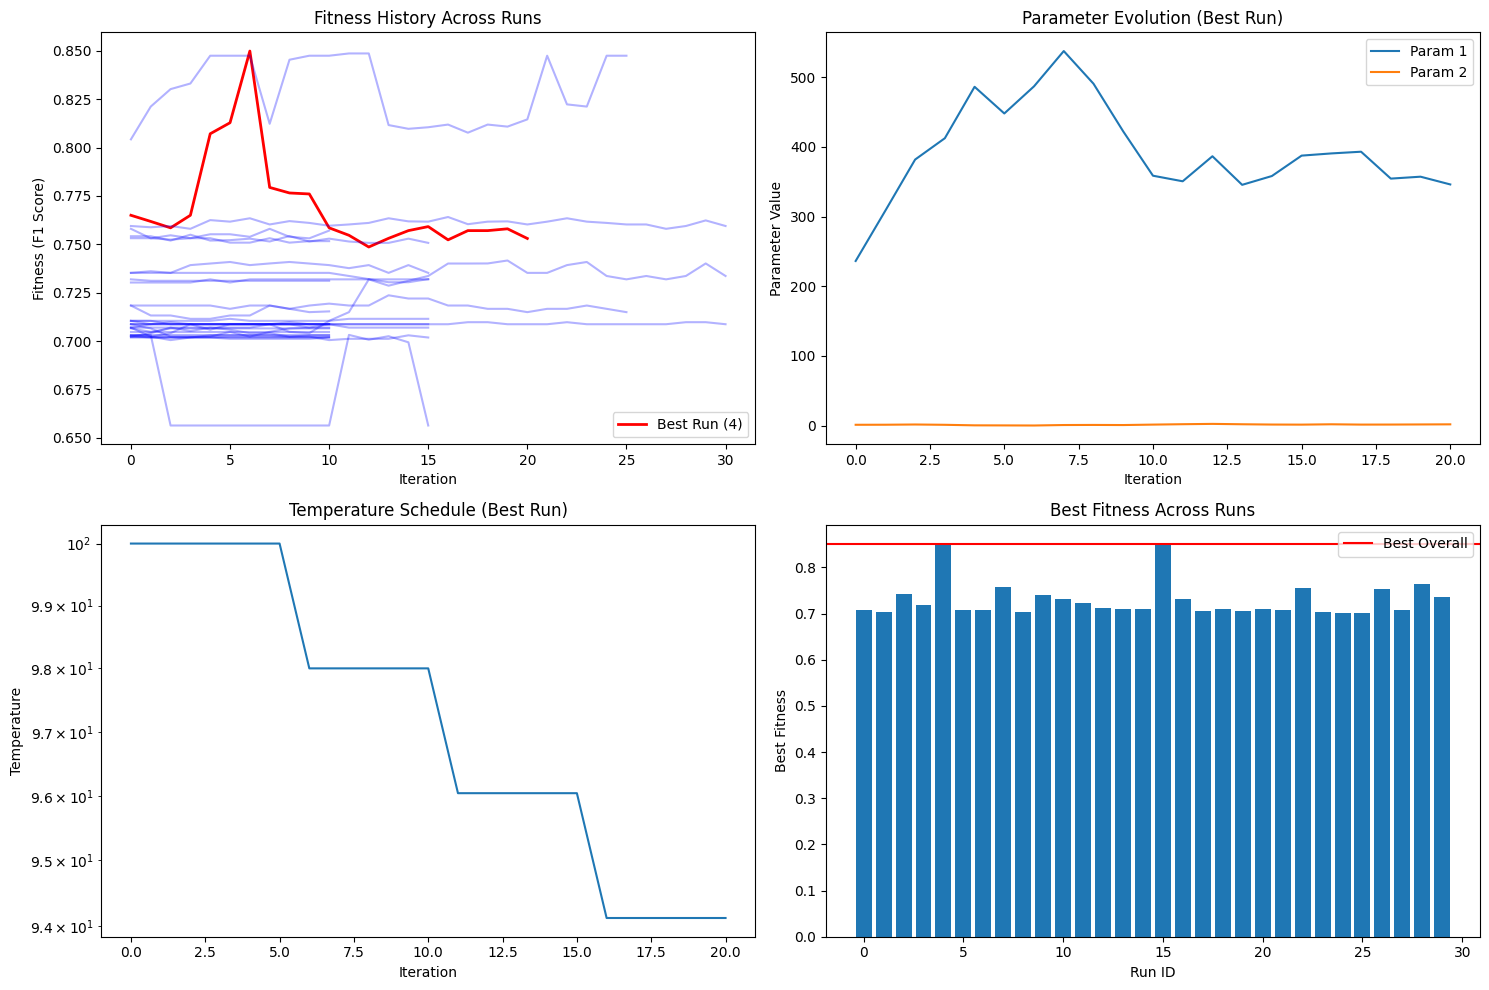

In [84]:
sa.plot_results()